1) Read and Normalize the Dataset <br>
2) Generate W for every query point<br>
3) No training is involved, directly make predictions using closed form solution<br>
   inv(X'WX) * (X'WY)<br>
4) Find the besy value of tau(Bandwidth parameter) [Cross validation]<br>

## Loading Data

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use("seaborn")

In [123]:
dfx = pd.read_csv("weightedX.csv")
dfy = pd.read_csv("weightedY.csv")

X = dfx.values
Y = dfy.values


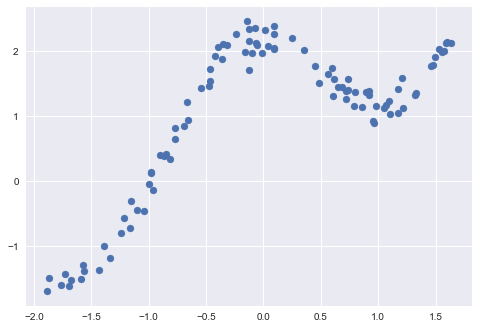

In [124]:
# Normalize the data
u = X.mean()
std = X.std()
X = (X-u)/std
XO = X
YO = Y
plt.scatter(X,Y)
plt.show()

In [125]:
#X = np.mat(X)
Y = np.mat(Y)
X =X.reshape((-1,))
zero = np.ones((X.shape[0]))
#print(X.shape)
#print(zero.shape)
X_ = np.vstack((X,zero))
X_ = X_.T
#print(X)

In [126]:
print(X_.T.shape)

(2, 99)


In [127]:
def getW(query_point,X,tau):
    W = np.eye(X.shape[0])
    for i in range(X.shape[0]):
        W[i,i] = np.exp(np.dot((query_point-X[i,0]),(query_point-X[i,0]))/-2*tau*tau)
    return W

In [128]:
def predict(X_,Y,query_point,tau):
    X_ = np.mat(X_)
    Y = np.mat(Y)
    W = getW(query_point,X_,tau)
    qx = np.mat([query_point,1])
    theta = np.linalg.pinv(X_.T*(W*X_))*(X_.T*(W*Y))
    pred = np.dot(qx,theta)
    #print(X_.T.shape)
    #print(W.shape)
    return pred
    

In [147]:
def plotPrediction(tau):
    X_test = np.linspace(-2,2)
    Y_pred = []
    for i in X_test:
        p = predict(X_,Y,i,tau)
        Y_pred.append(p[0][0])
    plt.scatter(X_test,Y_pred,color='red',label='predicted')
    plt.scatter(XO,YO)
    plt.title('Tau = %.1f'%tau)
    plt.legend()
    plt.show()
    
    

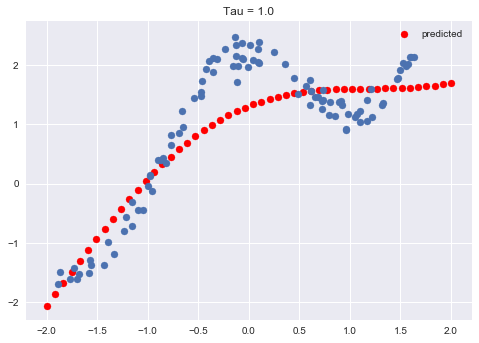

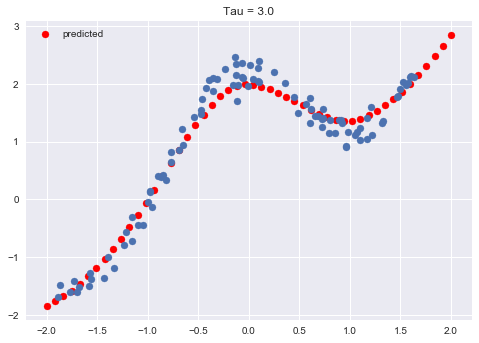

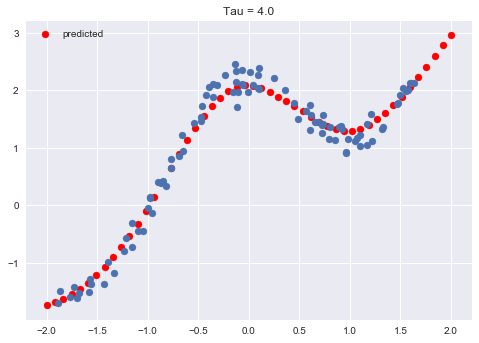

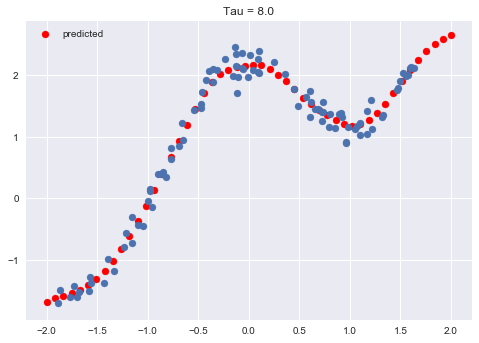

In [149]:
yss = np.array([1,3,4,8])
for i in yss:
    plotPrediction(i)